### Notebook to test OptoSim photon transport

In [1]:
from optosim.simulation.optical_photon import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import json

#### Setup the system geometry

In [ ]:
filename = 'testit.json'
# done through the config file.....
config_xams = {
    "detector": "XAMS",
    "nevents": 1000,
    "nphoton_per_event": 100000,
    "photon_zgen": 0.1,
    "geometry":{
        "type": "cylinder",
        "radius": 2.5,
        "ztop": 4.0,
        "zliq": 0.0,
        "zbot": -4.0,
        "ptfe_zmin": -99999.,
        "ptfe_zmax": +99999.
    },
    "npmt_xy": 2,
    "pmt":{
        "type": "square",
        "size": 2.54,
        "ndivs": 10
    },
    "scatter": True,
    "experimental_scatter_model": True
}

config_xenon = {
    "detector": "XENON",
    "nevents": 1000,
    "nphoton_per_event": 1000000,
    "photon_zgen": 0.1,
    "geometry":{
        "type": "cylinder",
        "radius": 65.0,
        "ztop": 10.0,
        "zliq": 0.0,
        "zbot": -150.0,
        "ptfe_zmin": -99999.,
        "ptfe_zmax": +99999.
    },
    "npmt_xy": 2,
    "pmt":{
        "type": "square",
        "size": 2.54,
        "ndivs": 10
    },
    "scatter": True,
    "experimental_scatter_model": True
}

config = config_xams
with open(filename, "w") as json_file:
    json.dump(config, json_file, indent=4)

#### Setup the simulation parameters

In [2]:
x0 = (2.2, 0, -0.1) # starting position of the photons

#### Simulate photon transport

In [3]:
%%time
#
# all configs in the json file.....
#
myPhoton = OpticalPhoton(config_file='../../optosim/config/config_example.json')

config = myPhoton.config
print(config)
xb = []
yb = []
xt = []
yt = []


for i in range(config['nphoton_per_event'][1]):
    if i%10000 == 0:
        print('processed ',i,' photons')
    # normal
    myPhoton.generate_photon(x0=x0)
    #myPhoton.set_photon_direction(np.array([1,0,0.0]))
    myPhoton.propagate()
    
    if myPhoton.is_detected():
        x = myPhoton.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb.append(x[0])
            yb.append(x[1])
        else:
            xt.append(x[0])
            yt.append(x[1])

    
xb = np.array(xb)
yb = np.array(yb)
xt = np.array(xt)
yt = np.array(yt)

print(len(xb), len(xt))

OpticalPhoton::Reading configuration from file: ../../optosim/config/config_example.json
'scatter' set to True
'experimental_scatter_model' set to True
{'detector': 'XAMS', 'nevents': 10, 'nphoton_per_event': [100, 100000], 'photon_zgen': 0.1, 'geometry': {'type': 'cylinder', 'radius': 3.2, 'ztop': 1.2, 'zliq': 0.0, 'zbot': -6.7, 'ptfe_zmin': -5.32, 'ptfe_zmax': -0.25}, 'npmt_xy': 2, 'pmt': {'type': 'square', 'size': 2.54, 'ndivs': 10}, 'scatter': True, 'experimental_scatter_model': True}
processed  0  photons
processed  10000  photons
processed  20000  photons
processed  30000  photons
processed  40000  photons
processed  50000  photons
processed  60000  photons
processed  70000  photons
processed  80000  photons
processed  90000  photons
21051 7041
CPU times: user 29.4 s, sys: 283 ms, total: 29.6 s
Wall time: 36.3 s


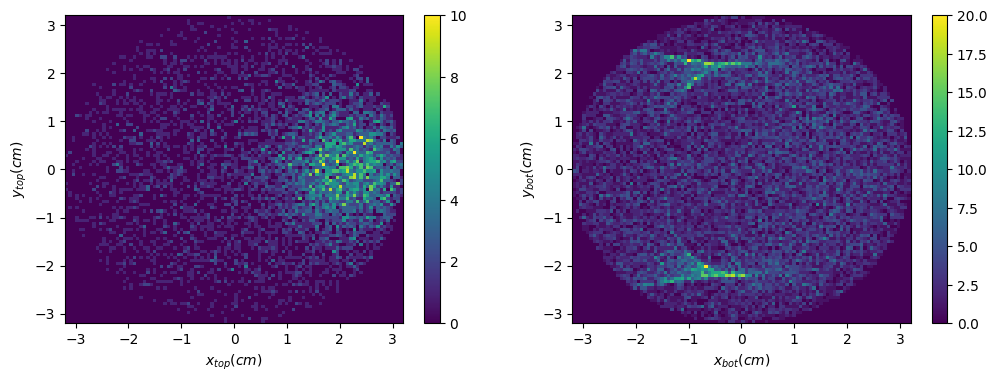

In [4]:
R = config['geometry']['radius']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

h1 = axs[0].hist2d(xt,yt,bins=(100,100),range=((-R,R),(-R,R)))
axs[0].set_xlabel('$x_{top} (cm)$')
axs[0].set_ylabel('$y_{top} (cm)$')
cbar = fig.colorbar(h1[3], ax=axs[0])


h2 = axs[1].hist2d(xb,yb,bins=(100,100),range=((-R,R),(-R,R)))
axs[1].set_xlabel('$x_{bot} (cm)$')
axs[1].set_ylabel('$y_{bot} (cm)$')
cbar = fig.colorbar(h2[3], ax=axs[1])

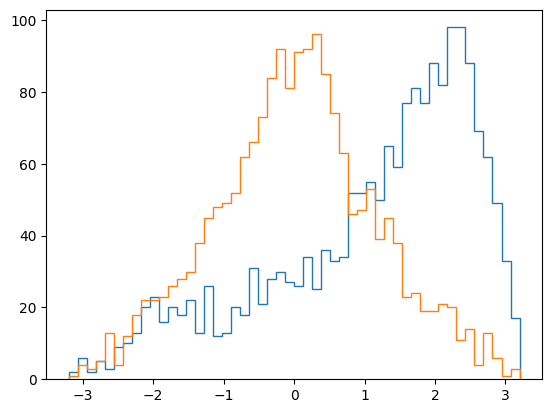

In [6]:
plt.hist(xt,bins=50,range=(-R,R), histtype='step')
plt.hist(yt,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

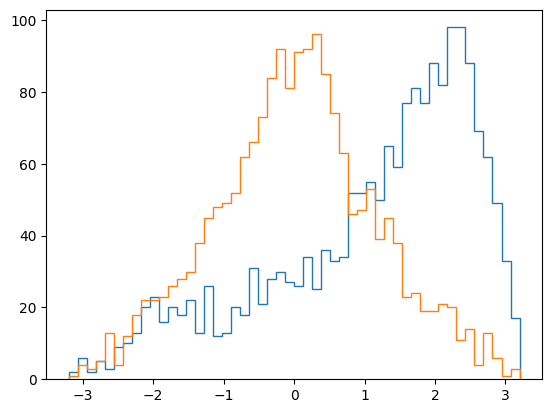

In [7]:
plt.hist(xt,bins=50,range=(-R,R), histtype='step')
plt.hist(yt,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

In [ ]:
import h5py